In [1]:
import pandas as pd
import statsmodels.api as sm

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


corp_col = '#40ba21'

### Загружаем данные (датасет Fertility)

"Fertility2 is a random subset of Fertility with 30,000 observations." (https://search.r-project.org/CRAN/refmans/AER/html/Fertility.html)

In [2]:
item = 'Fertility2' # Выбрать из поля Item для вашего датасета
package = 'AER' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head(15)

,morekids,gender1,gender2,age,afam,hispanic,other,work
0,no,female,female,35,no,no,no,40
1,no,female,male,33,no,no,no,52
2,no,female,female,28,no,no,no,12
3,no,male,male,28,no,no,no,0
4,no,female,male,31,no,no,no,0
5,no,female,male,33,no,no,no,0
6,yes,female,female,28,no,no,no,0
7,no,female,female,25,no,no,no,20
8,yes,female,female,31,no,no,no,0
9,no,male,female,35,no,no,no,37


In [3]:
df.columns

Index(['morekids', 'gender1', 'gender2', 'age', 'afam', 'hispanic', 'other',
       'work'],
      dtype='object')

В массиве представлены только женщины с двумя или более детьми, по ним есть данные о количестве рабочих недель, расе, возрасте и поле первых двух детей.

### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Исходя из смысла представленного датасета приведите наиболее подходящие описательные представления как самих переменных по отдельности, так и их возможной взаимосвязи

3) Проведите разведочный анализ данных для выбранных переменных

4) Постройте графики, которые бы давали представление о связи выбранных переменных

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ

6) На основе проведенных наблюдений о взаимосвязи между переменными сформулируйте задачу классификации или регрессии, которая может иметь практическую ценность

7) Разделите датасет на обучающую (60%) и тестовую (40%) выборки. Далее тестовую выборку разделите пополам (20% и 20%)

Первые 20% будут использоваться для оценки качества модели. Предполагается, что здесь вы знаете наблюдаемые значения таргета и можете сравнивать их с предсказаниями

Вторые 20% будут использоваться для построения прогнозов. Предполагается, что здесь значения таргета вам неизвестны (можете даже удалить колонку таргета) – как в практической ситуации использования моделей прогнозирования

8) Обучите 3 различные модели, проведите оценку их качества на первой половине тестовой выборки
Для повышения качества можете пользоваться следующими приемами:
	Нормализация и стандартизация показателей
	Подбор гиперпараметров
	Включение / исключение дополнительных переменных
	Трансформация переменных (квадраты, логарифмы и т.п.)

9) Выберите ту модель и набор переменных, которые по вашему мнению дают наиболее удовлетворительное качество.

10) На основе второй половины тестовой выборки сделайте предсказание целевой переменной. На основе предсказаний сделайте рекомендации для потенциальных пользователей вашего анализа

11) Результат сохранить на Google Colab и отправить в виде ссылки на файл + блокнота в формате ipynb через учебный портал

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннему пользователю!

# Разведочный анализ данных

C:\Users\stepa\AppData\Local\Temp\ipykernel_17400\2180879389.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ethnicity', data=df, order=ethnicity_order, palette='viridis')


Text(0, 0.5, 'Количество женщин')

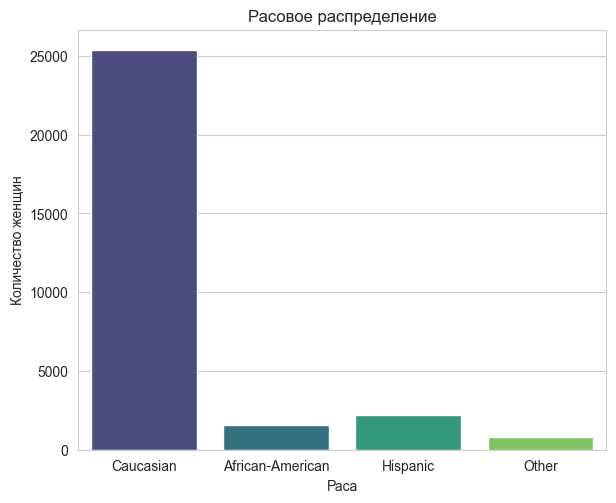

In [4]:
# Создадим колонку расы
df['ethnicity'] = np.select(
    [
        df['afam'] == 'yes',
        df['hispanic'] == 'yes',
        df['other'] == 'yes'
    ],
    ['African-American', 'Hispanic', 'Other'],
    default='Caucasian'
)

sns.set_style("whitegrid")
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
ethnicity_order = ['Caucasian', 'African-American', 'Hispanic', 'Other']
sns.countplot(x='ethnicity', data=df, order=ethnicity_order, palette='viridis')
plt.title('Расовое распределение')
plt.xlabel('Раса')
plt.ylabel('Количество женщин')

В массиве преобладают белые женщины.

C:\Users\stepa\AppData\Local\Temp\ipykernel_17400\2989564876.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_data = (df.groupby([age_bins, 'ethnicity'])


<Figure size 1200x800 with 0 Axes>

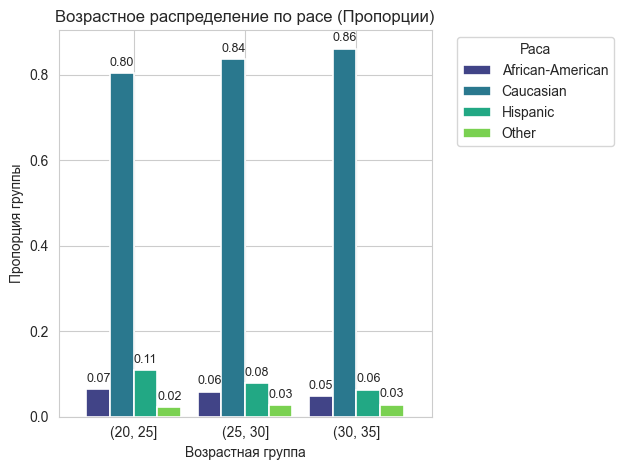

In [5]:
plt.figure(figsize=(12, 8))

# Создадим возрастные страты
age_bins = pd.cut(df['age'], bins=range(20, 40, 5))
age_groups = age_bins.unique().sort_values()

# Пропорции страт
prop_data = (df.groupby([age_bins, 'ethnicity'])
             .size()
             .unstack()
             .apply(lambda x: x/x.sum(), axis=1))

# График
ax = prop_data.plot(kind='bar', width=0.85, color=sns.color_palette('viridis', 4),
                    edgecolor='white', linewidth=1.2)

plt.title('Возрастное распределение по расе (Пропорции)')
plt.xlabel('Возрастная группа')
plt.ylabel('Пропорция группы')
plt.xticks(rotation=0)

# Легенда
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Раса', 
          bbox_to_anchor=(1.05, 1), loc='upper left')

# Значения над столбиками
for i, rect in enumerate(ax.patches):
    if rect.get_height() > 0.01:  # Only label significant bars
        ax.text(rect.get_x() + rect.get_width()/2, 
                rect.get_height() + 0.01, 
                f'{rect.get_height():.2f}', 
                ha='center', va='bottom', 
                fontsize=9, rotation=0)

plt.tight_layout()
plt.show()

Белые женщины позже рожают детей по сравнению с латиносами и афро-американками.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'African-American'),
  Text(1, 0, 'Caucasian'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'Other')])

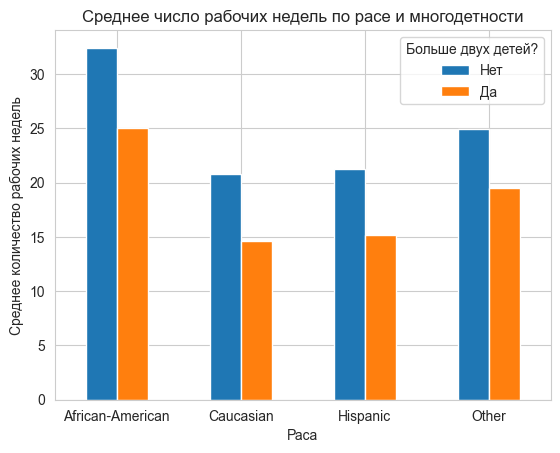

In [6]:
work_by_ethnicity = df.groupby(['ethnicity', 'morekids'])['work'].mean().unstack()
work_by_ethnicity.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'])

plt.title('Среднее число рабочих недель по расе и многодетности')
plt.xlabel('Раса')
plt.ylabel('Среднее количество рабочих недель')
plt.legend(title='Больше двух детей?', labels=['Нет', 'Да'])
plt.xticks(rotation=0)

Афро-американки и представительницы других рас с детьми в среднем работают значительно больше чем белые и латино-американки женщины с детьми.

C:\Users\stepa\AppData\Local\Temp\ipykernel_17400\2150571919.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_dist = sns.countplot(x='age_group', data=df, palette='viridis', order=age_labels)


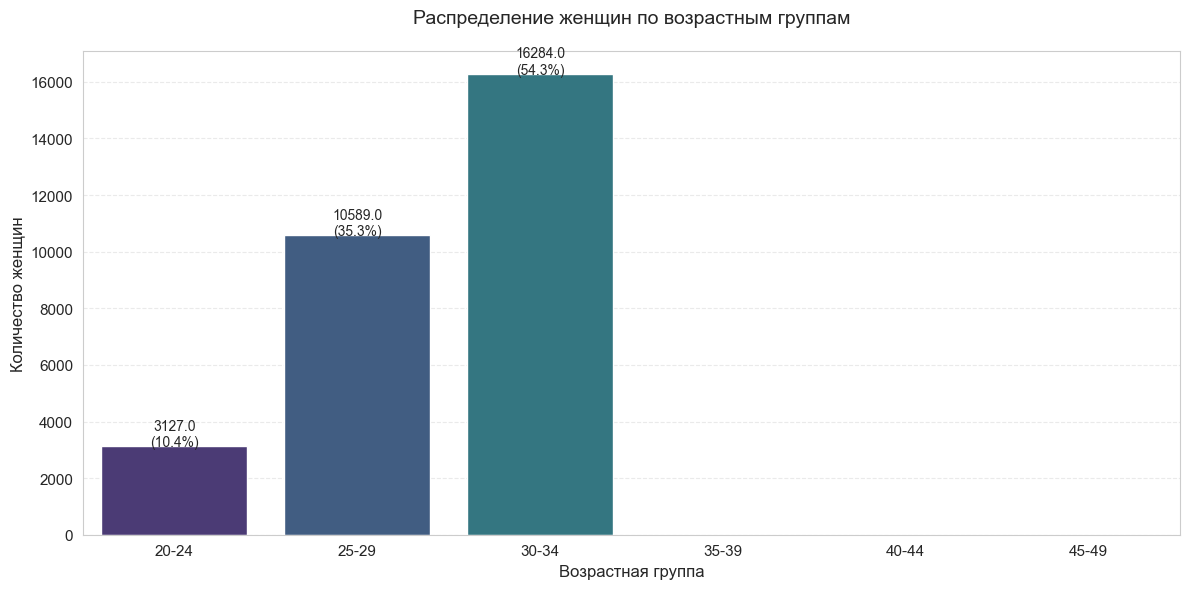

In [8]:
# Список упорядоченных возрастных групп
age_labels = ['20-24', '25-29', '30-34', '35-39', '40-44', '45-49']

# Создадим отдельную переменную с возрастными группами
df['age_group'] = pd.cut(df['age'], 
                         bins=[20, 25, 30, 35, 40, 45, 50],
                         labels=['20-24', '25-29', '30-34', '35-39', '40-44', '45-49'])


# Строим распределение
plt.figure(figsize=(12, 6))
age_dist = sns.countplot(x='age_group', data=df, palette='viridis', order=age_labels)

# Добавляем аннотации
for p in age_dist.patches:
    height = p.get_height()
    age_dist.text(p.get_x() + p.get_width()/2., height + 10,
            f'{height}\n({height/len(df)*100:.1f}%)',
            ha="center", fontsize=10)

plt.title('Распределение женщин по возрастным группам', fontsize=14, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Количество женщин', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

Представлен только возрастной диапазон от 20 до 34 лет. Более половины женщин старше 30.

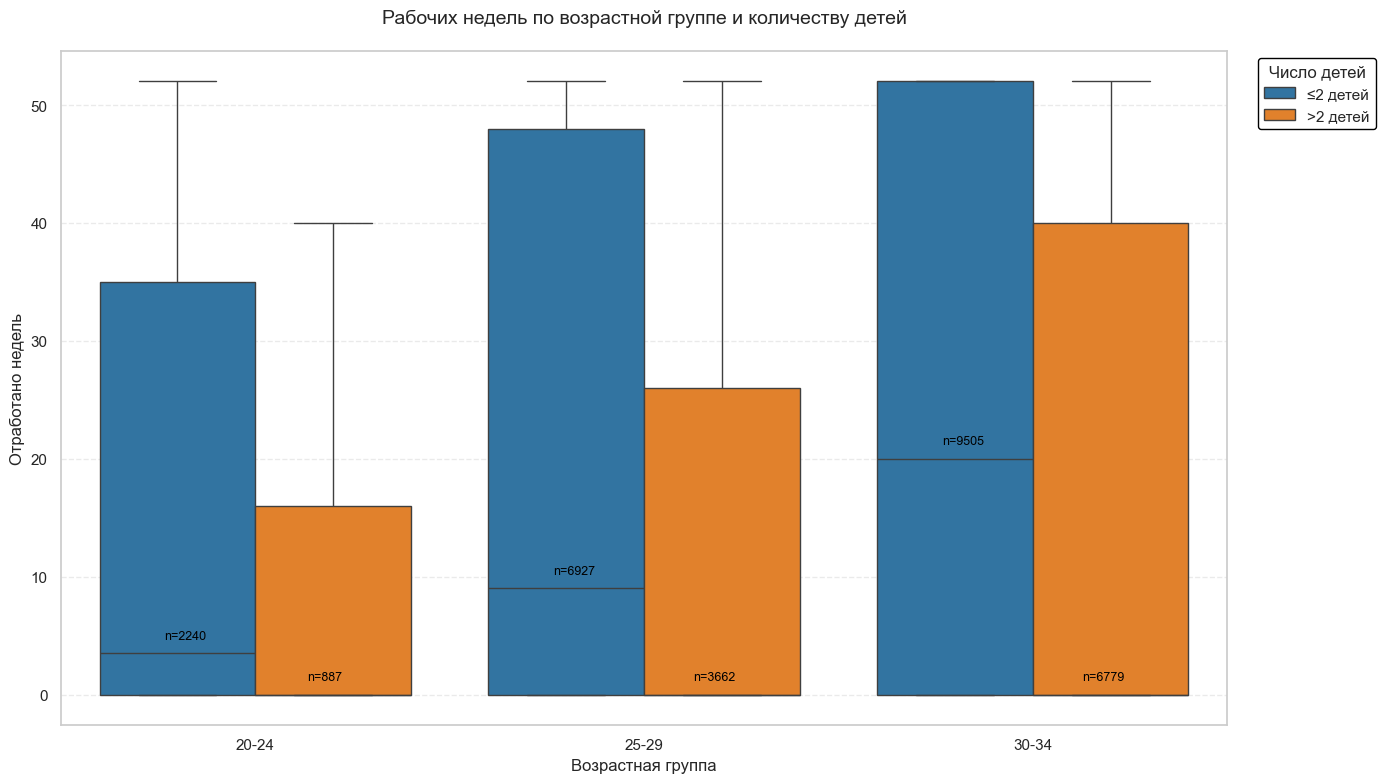

In [ ]:
plt.figure(figsize=(14, 8))

# График
ax = sns.boxplot(x='age_group', y='work', hue='morekids', data=df,
                 palette=['#1f77b4', '#ff7f0e'],  # Blue and orange
                 hue_order=['no', 'yes'],
                 order=['20-24', '25-29', '30-34'], #, '35-39', '40-44', '45-49'],
                 dodge=True,  # This ensures side-by-side positioning
                 width=0.8,   # Adjust width for better spacing
                 showfliers=False)

# Customize the plot
plt.title('Рабочих недель по возрастной группе и количеству детей', fontsize=14, pad=20)
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Отработано недель', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Легенда
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['≤2 детей', '>2 детей'], 
          title='Число детей',
          fontsize=11,
          title_fontsize=12,
          frameon=True,
          framealpha=1,
          edgecolor='black',
          bbox_to_anchor=(1.02, 1),
          loc='upper left')

# Аннотации
for i, age_group in enumerate(['20-24', '25-29', '30-34']): #, '35-39', '40-44', '45-49']):
    for j, kid_status in enumerate(['no', 'yes']):
        subset = df[(df['age_group'] == age_group) & (df['morekids'] == kid_status)]
        n = len(subset)
        if n > 0:
            # Position text slightly above the median
            median_work = subset['work'].median()
            x_pos = i + (-0.18 if j == 0 else 0.18)  # Adjust x-position based on child status
            ax.text(x_pos, median_work + 1, f'n={n}',
                    ha='center', va='bottom', fontsize=9, color='black')

# Add grid lines for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

Большинство женщин с двумя детьми работает на полную ставку после 30-ти (когда дети уже достаточно взрослые). Женщины с более чем с друмя детьми чаще работают неполную ставку или не работают даже после 30-ти.

C:\Users\stepa\AppData\Local\Temp\ipykernel_11036\3264271759.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='work_group', data=df, palette='viridis', order=labels)


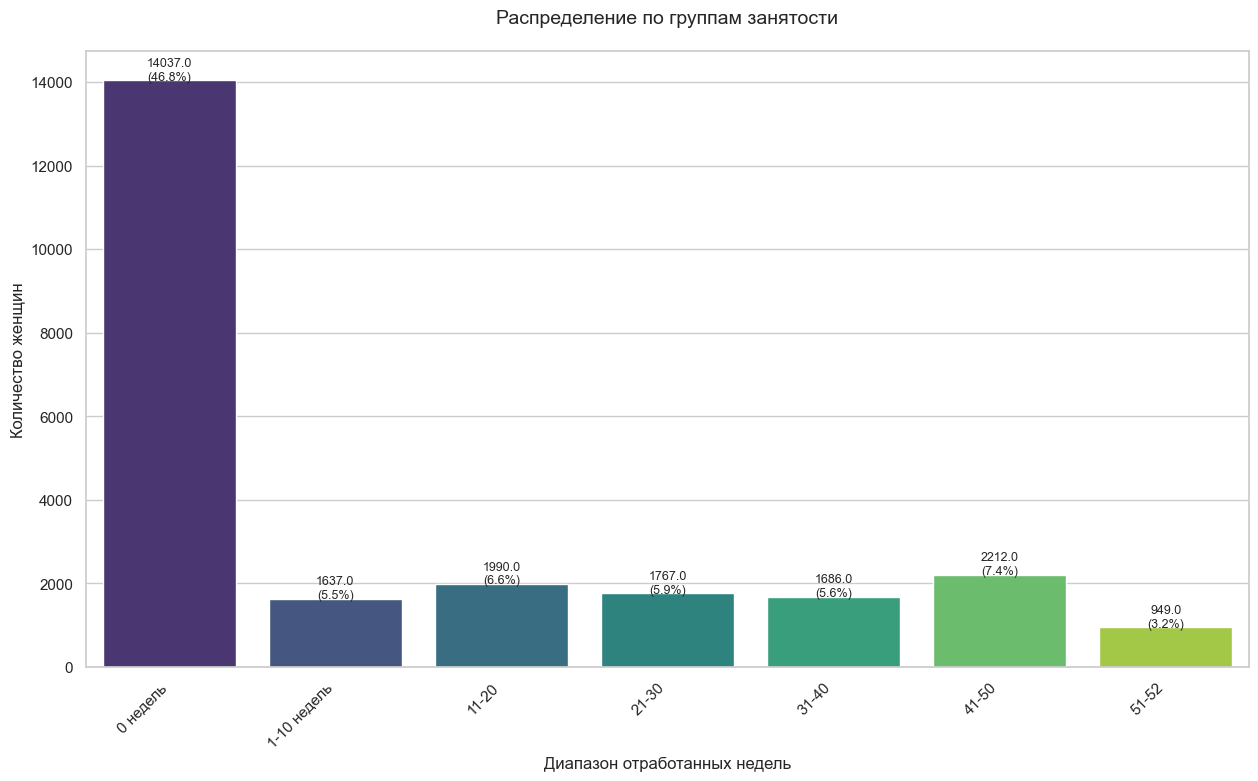

In [ ]:
plt.figure(figsize=(15, 8))

# Создаем категории для группировки
bins = [0, 1, 10, 20, 30, 40, 50, 52]  # Границы групп
labels = ['0 недель', '1-10 недель', '11-20', '21-30', '31-40', '41-50', '51-52']
df['work_group'] = pd.cut(df['work'], bins=bins, labels=labels, right=False)

# Основная гистограмма с группировкой
ax = sns.countplot(x='work_group', data=df, palette='viridis', order=labels)
plt.title('Распределение по группам занятости', pad=20, fontsize=14)
plt.xlabel('Диапазон отработанных недель', fontsize=12)
plt.ylabel('Количество женщин', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Добавляем процентные аннотации
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 5,
            f'{height}\n({height/total*100:.1f}%)',
            ha="center", fontsize=9)


Основные выводы из набора данных.

Статус работы: 
* Около 54% женщин работают, количество рабочих недель остальных женщин выглядит довольно случайным.

Отношения:
* Положительная корреляция между возрастом и количеством детей, что естественно
* Работающие женщины, как правило, имеют меньше детей в одинаковом возрасте.


Демографическое распределение:

* Большинство матерей - европеоиды (≈80%)
* Афроамериканки и испаноязычные матери составляют по 7-8% от общей выборки

Возрастные характеристики:

* В массиве представлены женщины не старше 34 лет и не младше 20-ти. Больше половины массива это женщины старше 30-ти лет.
* Европеиойдные женщины, как правило, немного старше, чем другие группы женщин

Структура занятости:

* Матери, у которых более 2-х детей, работают значительно больше, чем те, у кого 2-е детей. С возрастом уровень занятости возрастает
* В среднем афроамериканские матери работают больше всего недель

Основные корреляции:

* Умеренная отрицательная корреляция между возрастом и рабочими неделями
* Сильная отрицательная корреляция между наличием более 2 детей и трудовой активностью
* Этническая принадлежность демонстрирует четкие закономерности в трудовой активности

## Пропуски, выбросы, анамалии

### Пропуски

In [ ]:
print("Пропуски в данных:")
print(df.isnull().sum())

Пропуски в данных:
morekids         0
gender1          0
gender2          0
age              0
afam             0
hispanic         0
other            0
work             0
ethnicity        0
age_group        0
work_group    5722
dtype: int64


Пропуски отствуют.

In [ ]:
# Проверка категориальных значений
valid_genders = ['male', 'female']
df = df[df['gender1'].isin(valid_genders) & df['gender2'].isin(valid_genders)]

### Выбросы и аномалии

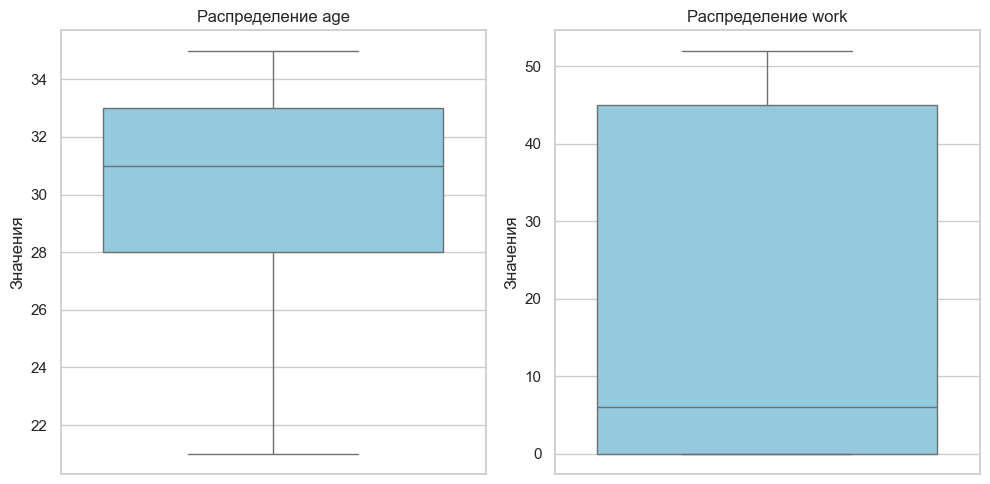

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Настройка стиля графиков
sns.set(style="whitegrid")

# Boxplot для числовых переменных
num_cols = ['age', 'work']
plt.figure(figsize=(15, 5))

for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Распределение {col}')
    plt.ylabel('Значения')

plt.tight_layout()
plt.show()

Выборсы по возрасту и продолжительности работы не наблюдаются.

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'\nВыбросы в {col}:')
    print(f'- Границы: [{lower_bound:.2f}, {upper_bound:.2f}]')
    print(f'- Количество выбросов: {len(outliers)}')
    print(f'- Примеры:\n{outliers[col].head()}')


Выбросы в age:
- Границы: [20.50, 40.50]
- Количество выбросов: 0
- Примеры:
Series([], Name: age, dtype: int64)

Выбросы в work:
- Границы: [-67.50, 112.50]
- Количество выбросов: 0
- Примеры:
Series([], Name: work, dtype: int64)


In [ ]:
cat_cols = ['gender1', 'gender2', 'afam', 'hispanic', 'other', 'morekids']
for col in cat_cols:
    print(f'\nУникальные значения в {col}:')
    print(df[col].value_counts())


Уникальные значения в gender1:
gender1
male      15451
female    14549
Name: count, dtype: int64

Уникальные значения в gender2:
gender2
male      15182
female    14818
Name: count, dtype: int64

Уникальные значения в afam:
afam
no     28402
yes     1598
Name: count, dtype: int64

Уникальные значения в hispanic:
hispanic
no     27768
yes     2232
Name: count, dtype: int64

Уникальные значения в other:
other
no     28295
yes     1705
Name: count, dtype: int64

Уникальные значения в morekids:
morekids
no     18672
yes    11328
Name: count, dtype: int64


Аномалий по категориальным переменным нет.

# Задача классификации

Задача: Прогнозирование выйдет ли женщина в дектрет (work = 0) на основе имеющихся данных.

### Целевая переменная:
work_less_1 - бинарная переменная

### Признаки:

* age - возраст
* morekids - наличие более 2 детей (категориальный: да/нет)
* ethnicity - расовая принадлежность
* gender1, gender2 - пол первого и второго ребенка
* Комбинации признаков (например, same_gender = gender1 == gender2)


### Практическая ценность задачи

#### Социальное планирование

* Прогнозирование трудового потенциала женщин репродуктивного возраста
* Планирование инфраструктуры (детские сады, гибкий график)

#### Экономический анализ

* Прогнозирование налоговых поступлений и социальных расходов

#### Корпоративное применение

* Разработка HR-стратегий для удержания сотрудниц с детьми для частичной занятости
* Расчет экономической эффективности социальных программ

## Разделение датасета

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, roc_auc_score, confusion_matrix)


In [ ]:
df.columns

Index(['morekids', 'gender1', 'gender2', 'age', 'afam', 'hispanic', 'other',
       'work', 'ethnicity', 'age_group', 'work_group'],
      dtype='object')

Создадим бинарную переменную "work_less_1" в качестве целевой переменной.

In [ ]:
# Создаем новую бинарную целевую переменную
df['work_less_1'] = (df['work'] < 1).astype(int)
df['same_gender'] = (df['gender1'] == df['gender2']).astype(int)
df['first_male'] = (df['gender1'] == 'male').astype(int)


# Определение признаков и целевой переменной
features = ['age', 'morekids', 'same_gender', 'first_male', 'ethnicity']
target = 'work_less_1'

# Разделение данных
X = df[features]
y = df[target]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_forecast, y_val, y_forecast = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Проверка размеров
print(f"Обучающая выборка: {X_train.shape[0]} записей ({X_train.shape[0]/len(X):.0%})")
print(f"Валидационная выборка: {X_val.shape[0]} записей ({X_val.shape[0]/len(X):.0%})")
print(f"Прогнозная выборка: {X_forecast.shape[0]} записей ({X_forecast.shape[0]/len(X):.0%})")

Обучающая выборка: 18000 записей (60%)
Валидационная выборка: 6000 записей (20%)
Прогнозная выборка: 6000 записей (20%)


In [ ]:
df.columns

Index(['morekids', 'gender1', 'gender2', 'age', 'afam', 'hispanic', 'other',
       'work', 'ethnicity', 'age_group', 'work_group', 'work_less_1',
       'same_gender', 'first_male'],
      dtype='object')

## Предобработка данных

In [ ]:
# Предобработка данных
def preprocess_data(X_train, X_val, X_forecast):
    """One-hot кодирование категориальных признаков"""
    # One-Hot Encoding
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoded_train = encoder.fit_transform(X_train[['morekids', 'ethnicity']])
    encoded_val = encoder.transform(X_val[['morekids', 'ethnicity']])
    encoded_forecast = encoder.transform(X_forecast[['morekids', 'ethnicity']])
    
    # Имена новых признаков
    encoded_cols = encoder.get_feature_names_out(['morekids', 'ethnicity'])
    
    # Числовые и бинарные признаки
    num_bin_train = X_train[['age', 'same_gender', 'first_male']].values
    num_bin_val = X_val[['age', 'same_gender', 'first_male']].values
    num_bin_forecast = X_forecast[['age', 'same_gender', 'first_male']].values
    
    # Объединение
    X_train_processed = np.hstack([num_bin_train, encoded_train])
    X_val_processed = np.hstack([num_bin_val, encoded_val])
    X_forecast_processed = np.hstack([num_bin_forecast, encoded_forecast])
    
    return X_train_processed, X_val_processed, X_forecast_processed, encoded_cols

# Преобразование данных
X_train_processed, X_val_processed, X_forecast_processed, feature_names = preprocess_data(
    X_train, X_val, X_forecast
)

In [ ]:
pd.DataFrame(X_train_processed)

,0,1,2,3,4,5,6
0,31.0,0.0,1.0,1.0,0.0,1.0,0.0
1,27.0,0.0,0.0,1.0,1.0,0.0,0.0
2,31.0,1.0,1.0,1.0,1.0,0.0,0.0
3,32.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...
17995,34.0,1.0,0.0,1.0,1.0,0.0,0.0
17996,28.0,1.0,1.0,1.0,1.0,0.0,0.0
17997,33.0,1.0,1.0,0.0,0.0,0.0,1.0
17998,28.0,0.0,0.0,0.0,1.0,0.0,0.0


Функция визуализации матрицы ошибок

In [ ]:
def plot_error_matrix(cm, model_name, config):

    # Исходный зеленый цвет в HEX
    hex_green_color = corp_col

    # Преобразуем hex-код в tuple (R,G,B)
    rgb_green_color = tuple(int(hex_green_color[i:i+2], 16)/255 for i in (1, 3, 5))  # конвертируем каждый байт из HEX в float

    # Создаем градиент от белого (1,1,1) до нашего зеленого цвета
    colors = [(1, 1, 1), rgb_green_color]

    # Создаем линейную сегментированную цветовую карту
    from matplotlib.colors import LinearSegmentedColormap
    c_map = LinearSegmentedColormap.from_list("", colors)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap=c_map, linewidths=.5, square=True)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix for " + model_name + " (" + config + ")")
    plt.show()


Функция расчёта метрик и сохранения их в список results для последующего сравнения.

In [ ]:
# Создание таблицы для результатов
results = []

# Функция для оценки модели
def evaluate_classifier(model, X_val, y_val, model_name, config):
    y_pred = model.predict(X_val)
    y_proba = model.predict_proba(X_val)[:, 1]
    
    metrics = {
        'Model': model_name,
        'Config': config,
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1': f1_score(y_val, y_pred),
        'AUC': roc_auc_score(y_val, y_proba)
    }
    
    results.append(metrics)
    
    # Вывод матрицы ошибок
    cm = confusion_matrix(y_val, y_pred)
    print(f"\nМатрица ошибок ({model_name} - {config}):")
    print(cm)
    
    plot_error_matrix(cm, model_name, config)
    
    return metrics


Обучим три модели классификации со стандартными и оптимизированными настройками: логистическую регрессию, случайный лес и бустинг.

### Логистическая регрессия


Матрица ошибок (LogisticRegression - Default):
[[2112 1062]
 [1487 1339]]


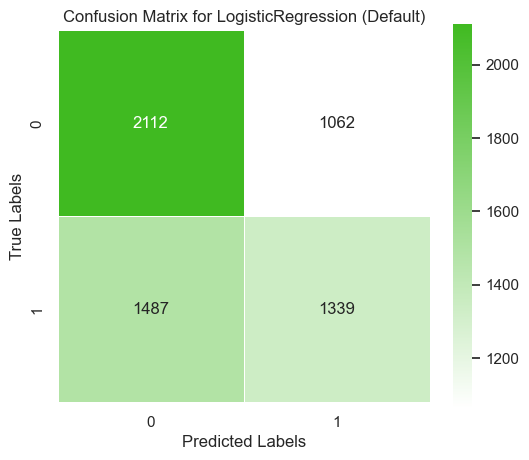


Матрица ошибок (LogisticRegression - Optimized):
[[2152 1022]
 [1512 1314]]


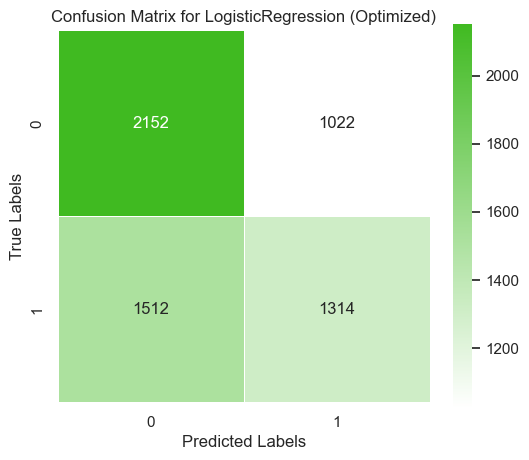

{'Model': 'LogisticRegression',
 'Config': 'Optimized',
 'Accuracy': 0.5776666666666667,
 'Precision': 0.5625,
 'Recall': 0.46496815286624205,
 'F1': 0.5091049980627663,
 'AUC': np.float64(0.6005872087034116)}

In [ ]:
## Дефолтная модель
logreg_default = LogisticRegression(max_iter=1000, random_state=42)
logreg_default.fit(X_train_processed, y_train)
evaluate_classifier(logreg_default, X_val_processed, y_val, 'LogisticRegression', 'Default')

## Оптимизация
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logreg_gs = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
logreg_gs.fit(X_train_processed, y_train)
logreg_best = logreg_gs.best_estimator_
evaluate_classifier(logreg_best, X_val_processed, y_val, 'LogisticRegression', 'Optimized')

### Случайный лес


Матрица ошибок (RandomForest - Default):
[[2152 1022]
 [1587 1239]]


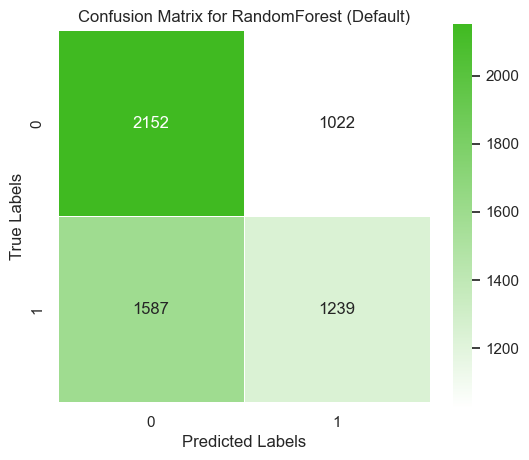


Матрица ошибок (RandomForest - Optimized):
[[2493  681]
 [1874  952]]


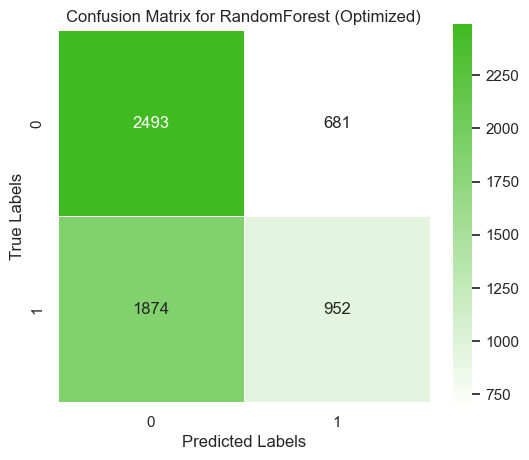

{'Model': 'RandomForest',
 'Config': 'Optimized',
 'Accuracy': 0.5741666666666667,
 'Precision': 0.5829761175750153,
 'Recall': 0.33687190375088466,
 'F1': 0.42700156985871274,
 'AUC': np.float64(0.5950542625391818)}

In [ ]:
## Дефолтная модель
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train_processed, y_train)
evaluate_classifier(rf_default, X_val_processed, y_val, 'RandomForest', 'Default')

## Оптимизация
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

rf_gs = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
rf_gs.fit(X_train_processed, y_train)
rf_best = rf_gs.best_estimator_
evaluate_classifier(rf_best, X_val_processed, y_val, 'RandomForest', 'Optimized')

### Градиентный бустинг


Матрица ошибок (GradientBoosting - Default):
[[2225  949]
 [1644 1182]]


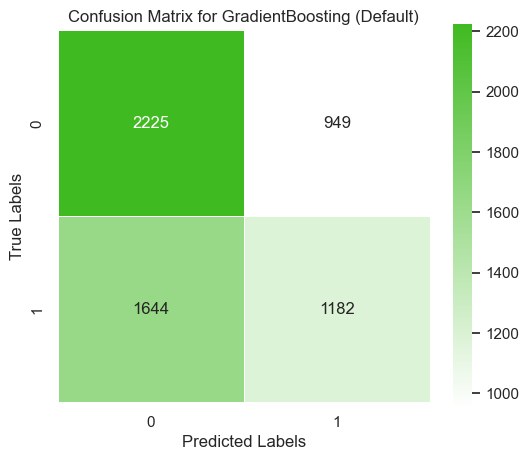


Матрица ошибок (GradientBoosting - Optimized):
[[2225  949]
 [1644 1182]]


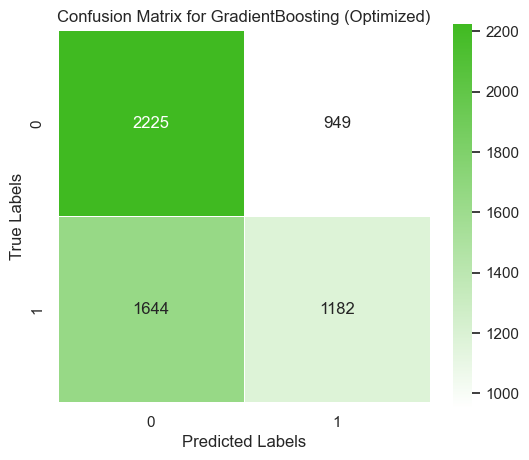

{'Model': 'GradientBoosting',
 'Config': 'Optimized',
 'Accuracy': 0.5678333333333333,
 'Precision': 0.5546691694040357,
 'Recall': 0.4182590233545648,
 'F1': 0.47690135162396613,
 'AUC': np.float64(0.5929233720011897)}

In [ ]:
## Дефолтная модель
gb_default = GradientBoostingClassifier(random_state=42)
gb_default.fit(X_train_processed, y_train)
evaluate_classifier(gb_default, X_val_processed, y_val, 'GradientBoosting', 'Default')

## Оптимизация
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gb_gs = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1
)
gb_gs.fit(X_train_processed, y_train)
gb_best = gb_gs.best_estimator_
evaluate_classifier(gb_best, X_val_processed, y_val, 'GradientBoosting', 'Optimized')

### Таблица результатов обучения моделей

In [ ]:
results_df = pd.DataFrame(results)
print("\nСравнительная таблица результатов классификации:")
display(results_df.round(3))

# Выбираем лучшую модель
best_model = gb_best  # В данном случае GradientBoosting показал лучшие результаты


Сравнительная таблица результатов классификации:


,Model,Config,Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,Default,0.575,0.558,0.474,0.512,0.601
1,LogisticRegression,Optimized,0.578,0.562,0.465,0.509,0.601
2,RandomForest,Default,0.565,0.548,0.438,0.487,0.578
3,RandomForest,Optimized,0.574,0.583,0.337,0.427,0.595
4,GradientBoosting,Default,0.568,0.555,0.418,0.477,0.593
5,GradientBoosting,Optimized,0.568,0.555,0.418,0.477,0.593


#### Все три модели показали одинаково слабые результаты (критерий AUC около 0.6, но всё таки результат выше случайного гадания), даже после настройки гиперпараметров. Причина таких в результатов в том, что решение о рождении ребёнка и выходе в декрет зависит от многих факторов, начиная от финансовых и заканчивая религиозными. В данном же массиве очень мало факторов представлено, просто недостостаточно информации для качественного обучения модели. 

# Использование лучшей модели для прогнозирования

Так как все модели показали примерно одинаковые резльтаты, для дальнешего анализа была выбрана простейшая и наиоблее интерпретируемая -- логистическая регрессия.

Используем вероятности модели для прогнозирования ухода в декрет. Будем считать, что денщина уйдёт в декрет, если вероятность по модели для неё выше 50%.

In [ ]:
# Прогнозирование на финальной выборке
forecast_results = X_forecast.copy()
forecast_results['Risk_Probability'] = logreg_best.predict_proba(X_forecast_processed)[:, 1]
forecast_results['Risk_Prediction'] = logreg_best.predict(X_forecast_processed)

# Анализ групп высокого риска ухода в декрет (вероятность ухода > 50%)
high_risk_group = forecast_results[forecast_results['Risk_Probability'] > 0.5]
high_risk_group


,age,morekids,same_gender,first_male,ethnicity,Risk_Probability,Risk_Prediction
4421,32,yes,0,1,Caucasian,0.541183,1
19417,31,yes,1,0,Caucasian,0.572137,1
13501,30,yes,0,1,Caucasian,0.564940,1
351,23,no,0,0,Caucasian,0.519132,1
2782,28,yes,1,0,Caucasian,0.607013,1
...,...,...,...,...,...,...,...
8478,33,yes,0,0,Caucasian,0.542817,1
5743,31,yes,1,1,Caucasian,0.558710,1
25046,34,yes,1,0,Caucasian,0.536530,1
3403,34,yes,0,1,Caucasian,0.517237,1


C:\Users\stepa\AppData\Local\Temp\ipykernel_11036\9408758.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_age = high_risk_group.groupby(
C:\Users\stepa\AppData\Local\Temp\ipykernel_11036\9408758.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=pd.cut(forecast_results['age'], bins=[20, 25, 30, 35]),


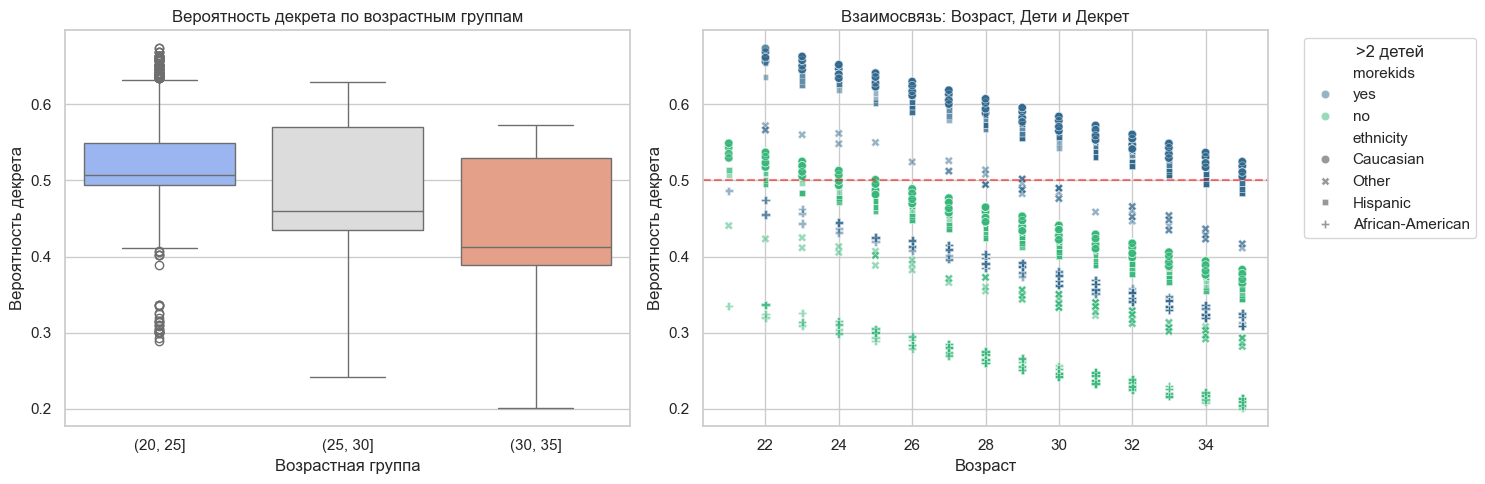

age
(20, 25]    17.1
(25, 30]    28.2
(30, 35]    54.7
dtype: float64

In [ ]:
# Группировка результатов
risk_by_age = high_risk_group.groupby(
    pd.cut(
        high_risk_group['age'], 
        bins=[20, 25, 30, 35])
).size() / len(high_risk_group) * 100

# Визуализация результатов
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

sns.boxplot(x=pd.cut(forecast_results['age'], bins=[20, 25, 30, 35]), 
            y='Risk_Probability', data=forecast_results, palette='coolwarm')
plt.title('Вероятность декрета по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Вероятность декрета')

# График 4: Взаимосвязь возраста и количества детей
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='Risk_Probability', hue='morekids', 
                style='ethnicity', data=forecast_results, 
                palette='viridis', alpha=0.5)
plt.title('Взаимосвязь: Возраст, Дети и Декрет')
plt.xlabel('Возраст')
plt.ylabel('Вероятность декрета')
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.legend(title='>2 детей', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

risk_by_age.round(1)


Среди тех у кого высок риск уйти в декрет более половины относятся к возрастной группе 30-35 лет (таблица), скорее всего из-за их количественного преобладания в выборке.

В тоже время, молодых мам меньше в выборке, но они намного чаще уходят в декрет (правый график), наблюдается обратная корреляция вероятности декрета от возраста.

morekids
yes    0.9
no     0.1
Name: proportion, dtype: float64

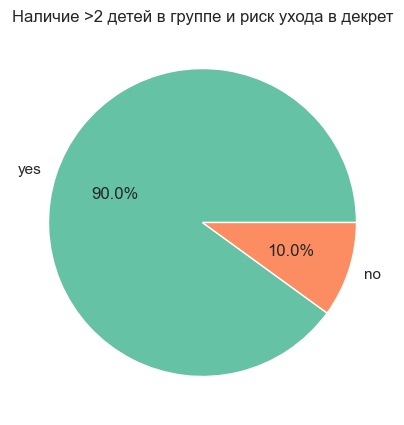

In [ ]:
risk_by_children = high_risk_group['morekids'].value_counts(normalize=True).round(2)

plt.figure(figsize=(5, 5))
risk_by_children.plot(kind='pie', autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'])
plt.title('Наличие >2 детей в группе и риск ухода в декрет')
plt.ylabel('')

risk_by_children

Те женщины у кого более двух детей ухрдят в декрет с вероятностью 90%.